# Analysis of Diabetic Patient Data 

The dataset consist of predictor variables and one target variable: Outcome. 

Independent variables include:

- Pregnancies
- glucose
- Blood pressure  
- Skin thickness
- Insulin  
- Body mass index  
- Diabetes pedigree function.
- Age  
- Outcome:(0 or 1).


In [2]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv") #Importing our dataset as a dataframe using .read_csv() function
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head() # Showing the first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info() #Column names, Total entries, Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.value_counts() #Showing number of records in dataset = 768 entries

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [8]:
df.isna().sum() # The dataset seem to have no missing entries or values  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Descriptive statistics: Mean, Median, Standard Deviation, Min, Max, Qaurtiles(Upper, Lower)

In [8]:
df.describe() #Generating summary statistics of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### Columns with missing values 

In [9]:
df.eq(0).sum() #Checking non realistic zero entries in the dataset

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
df.groupby("Outcome").value_counts() # patients based on outcome

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age
0        0            57       60             0              0        21.7  0.735                     67     1
                      67       76             0              0        45.3  0.194                     46     1
         12           100      84             33             105      30.0  0.488                     46     1
         10           133      68             0              0        27.0  0.245                     36     1
                      139      80             0              0        27.1  1.441                     57     1
                                                                                                            ..
1        5            116      74             29             0        32.3  0.660                     35     1
                      124      74             0              0        34.0  0.220                     38     1
      

Text(0.5, 1.0, 'Number of positive and negative Patients')

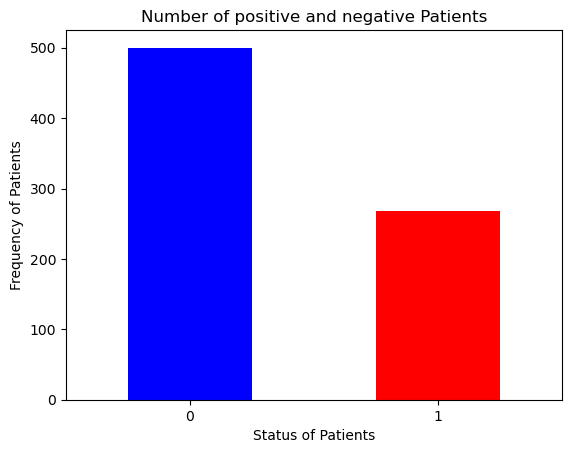

In [11]:
df.loc[:, "Outcome"].value_counts()
df["Outcome"].value_counts().plot.bar(color = {'blue', 'red'})#Data to plot
plt.xticks(rotation = 'horizontal') #Rotating the labels 0,1
plt.xlabel('Status of Patients') #X-axis
plt.ylabel('Frequency of Patients')#Y-axis
plt.title('Number of positive and negative Patients')#Heading of bar plot

### Correlation Analysis

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Visualizing Correlation on Heatmap

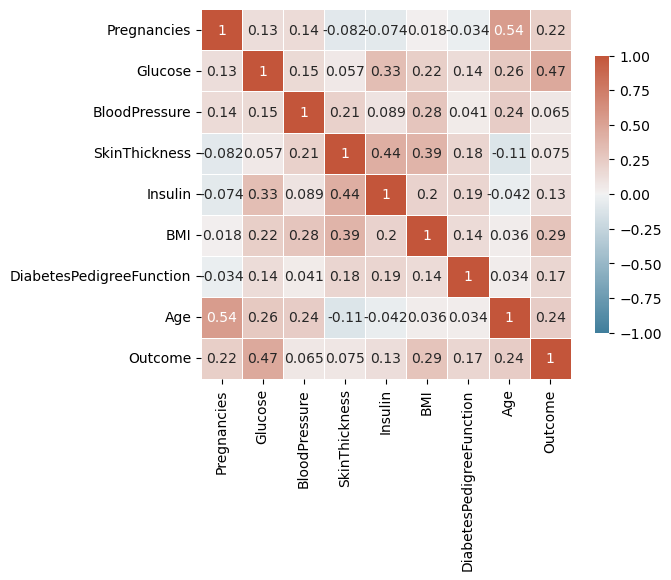

In [14]:
#Define color map for our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=df.corr(),   #our correlation matrix
        linewidths=0.5,   #the width of lines separating the matrix squares
        square=True,      #enforce 1:1 ratios among correlation cells
        cmap=cmap,        #use the color map we defined above
        vmax=1,           #define the max of our correlation scale
        vmin=-1,          #define the min of our correlation scale
        center=0,          #The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}, #shrink the scale a bit
    annot = True
    )
plt.yticks(rotation=0)      # adjust y-axis ticks for egibility
plt.show()                  # show the heatmap
#Bright colors indicate high value for the correlation while dull colors represent a low value of correlation

### Filling zero values with NaN

In [17]:
df.iloc[:, 1: 6] = df.iloc[:, 1: 6].replace(0, np.NAN) #Except the Pregnancy, Age and Outcome columns
df.iloc[:, 1: 6]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### Missing values counts for each variable

In [19]:
df.isnull().sum() #Missing values having NAN

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Fill missing values with mean column values
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [20]:
df=df.fillna(df.mean())  
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### Descriptive statistics 

In [22]:
df.loc[:, 'Glucose' : 'BMI'].describe() #Eliminated NaN values in the dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.435949,12.096346,8.790942,85.021108,6.875151
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.202592,29.153420,155.548223,32.400000
75%,140.250000,80.000000,32.000000,155.548223,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


### Data distribution of each variable 

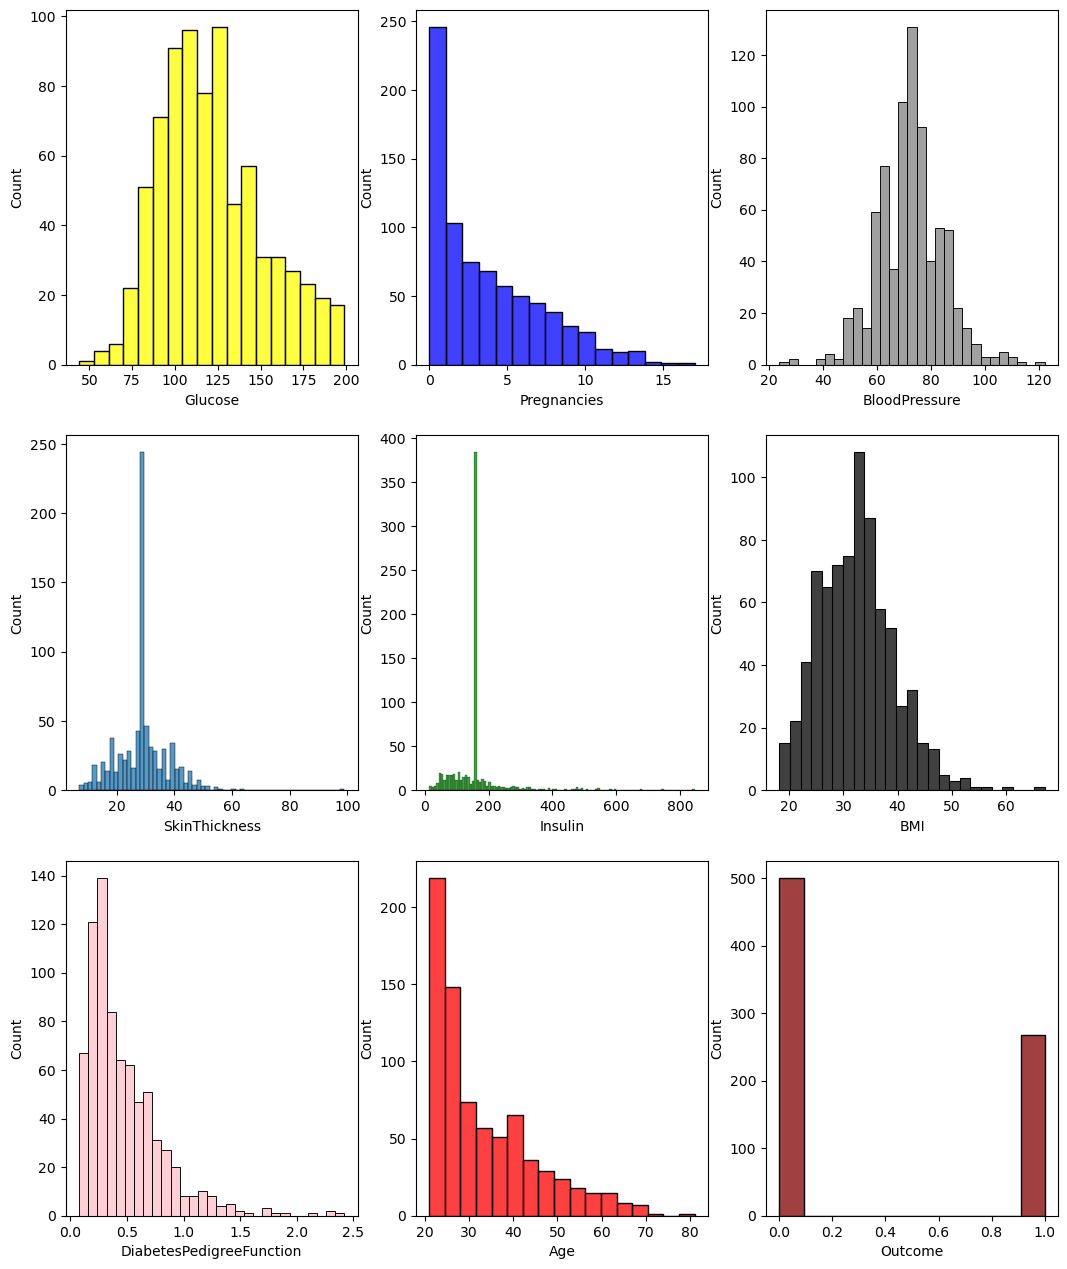

In [26]:
plt.figure(figsize=(12.8,15.66))#creates an inch by inch image showing the proportional frequencies of each of the column items in the dataframe 
#Using index positions to plot distributions together for easy visualization
#Glucose variable plot
plt.subplot(3,3,1)
sns.histplot(df.Glucose, kde=False, color='yellow');
#Pregnancies variable plot
plt.subplot(3,3,2)
sns.histplot(df.Pregnancies, kde=False, color='blue');
#BloodPressure variable plot
plt.subplot(3,3,3)
sns.histplot(df.BloodPressure, kde=False, color='grey');
#SkinThickness variable plot
plt.subplot(3,3,4)
sns.histplot(df.SkinThickness, kde=False, );
#Insulin variable plot
plt.subplot(3,3,5)
sns.histplot(df.Insulin, kde=False, color='green');
#BMI variable plot
plt.subplot(3,3,6)
sns.histplot(df.BMI, kde=False, color='black');
#DiabetesPedigreeFunction variable plot
plt.subplot(3,3,7)
sns.histplot(df.DiabetesPedigreeFunction, kde=False, color='pink');
#Age variable plot
plt.subplot(3,3,8)
sns.histplot(df.Age, kde=False, color='red');
#Outcome variable plot
plt.subplot(3,3,9)
sns.histplot(df.Outcome, kde=False, color='maroon');

### Boxplots for variables

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

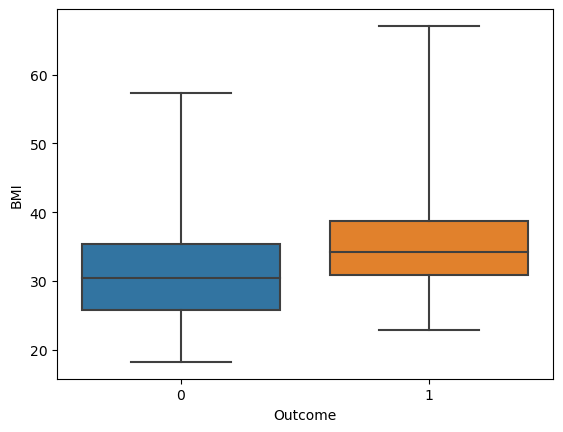

In [28]:
sns.boxplot(x="Outcome", y="BMI", data=df, whis=10)
#Boxplot shows that the BMI of the non diabetic(i.e in blue)is less than the BMI of the diabetic patients(in Orange)

<AxesSubplot: xlabel='Outcome', ylabel='Pregnancies'>

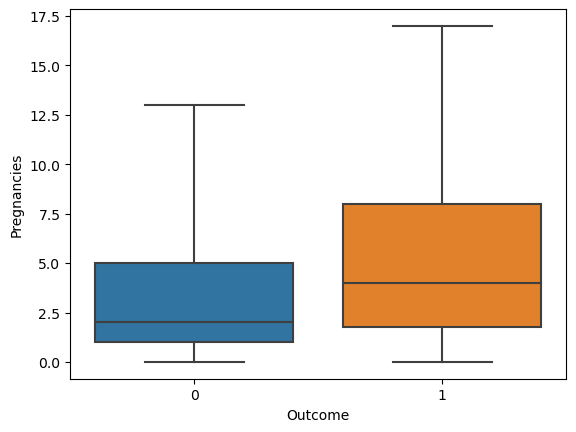

In [29]:
sns.boxplot(x="Outcome", y="Pregnancies", data=df, whis=3.0)
#Boxplot shows that the data for non-diabetic pregrancies is positively skewed, 
#while diabetic pregnancies is normally distributed
#The data is largely spread out for diabetic patients with pregrancies than non diabetic pregrant patients

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

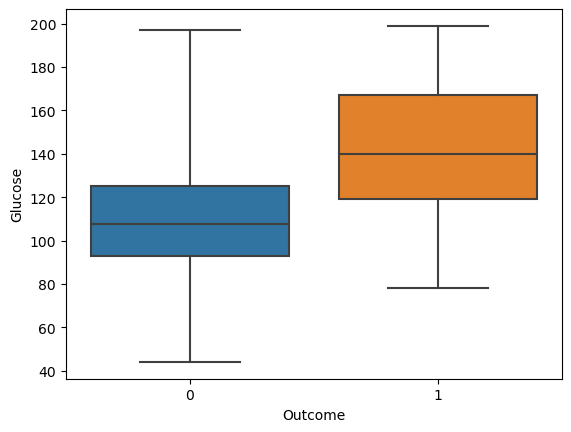

In [30]:
sns.boxplot(x="Outcome", y="Glucose", data=df, whis=3.0) 
#while non diabetic glucose is normally distributed; diabetic patients have glucose levels skewed to the right.
#The data is evenly spread out for non diabetic patients while diabetic patients have a larger interquartile range
#The diabetics data have higher values for glucose than non diabetics from these boxplots

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

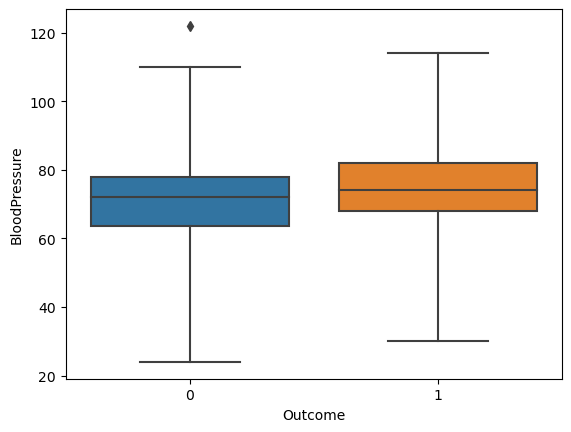

In [31]:
sns.boxplot(x="Outcome", y="BloodPressure", data=df, whis=3.0)
#From the boxplots, Data from non diabetic patients have an outlier to the right, unlike diabetic patients data
#The blood pressure level of diabetics are more concentrated on the upper quartile
#NOn diabetics have blood pressure concentrated on the lower quartiles of the boxplot

<AxesSubplot: xlabel='Outcome', ylabel='SkinThickness'>

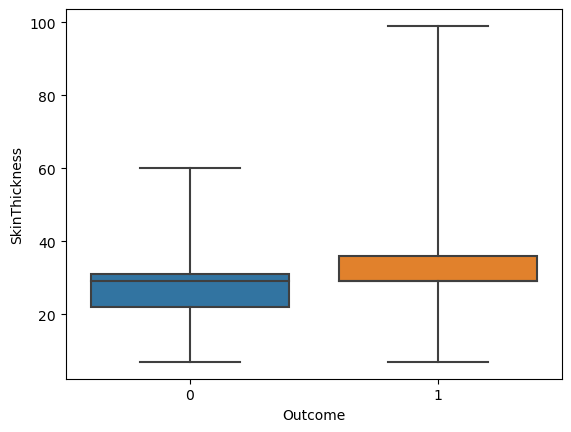

In [32]:
sns.boxplot(x="Outcome", y="SkinThickness", data=df, whis=10)
#Under skin thickness, most of non diabetics lie on the lower bounds of dataset, negative skewed data
#This is not so much of a difference as compared to the diabetics, who have potentially more spread data, 
#with higher values of outliers

<AxesSubplot: xlabel='Outcome', ylabel='Insulin'>

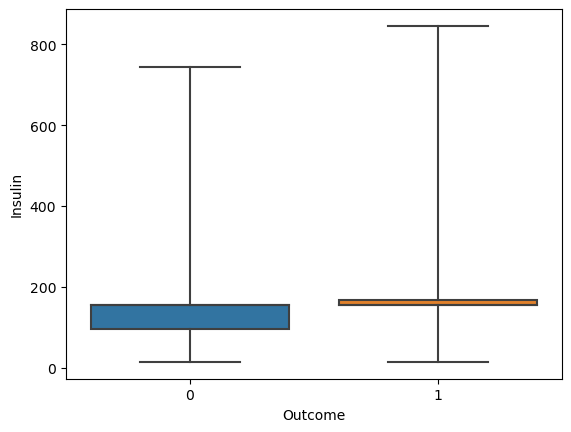

In [33]:
sns.boxplot(x="Outcome", y="Insulin", data=df, whis=500)
#Non diabetics have normally distributed insulin levels, while most diabetics have high concentration of insulin
#at the extreme points of the boxplot. THis shows a right skewed data for diabetic insulin levels; they also have
#higher number of outliers than non diabetics

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

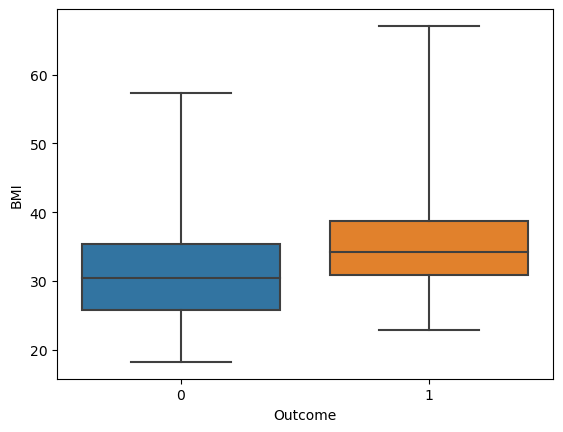

In [34]:
sns.boxplot(x="Outcome", y="BMI", data=df, whis=10)
#For diabetics, more data lies on the upper quartile, with some outliers
#Non diabetics have near normal distributed BMI, as shown by a balanced upper and lower quartile data values

<AxesSubplot: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

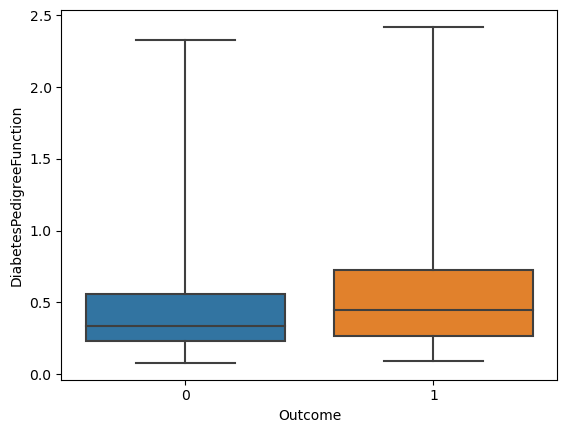

In [35]:
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df, whis=10)
#Non diabetics have almost near equal distribution with diabetics with regard to pedigree function.
#Both have equal lengths of whiskers in the upper bound and lower bounds,
#Both have a higher concentration of values to the upper bounds of the distribution

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

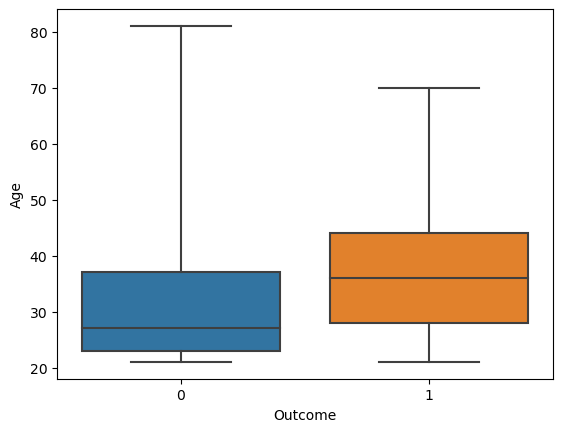

In [36]:
sns.boxplot(x="Outcome", y="Age", data=df, whis=10)
#Non diabetics have higher age values skewed to the right, low values in the lower quartile, with some outliers
#Diabetics have near symmetrical data distribution of age

### Demographics and distribution of diabetics/nondiabetics across age variable

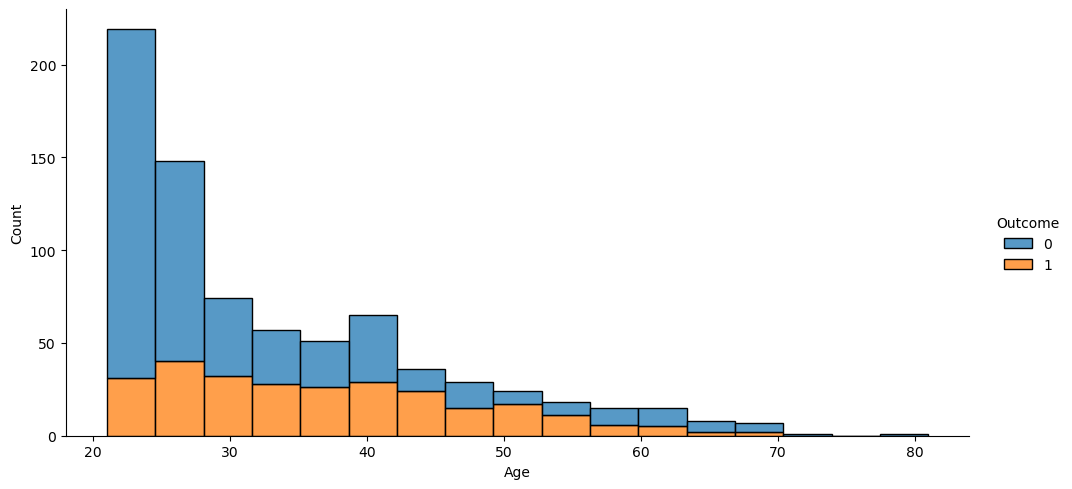

In [37]:
sns.displot(df, x='Age', hue='Outcome', height=5, aspect=2, multiple='stack', kind='hist', color='#ff9f9b')

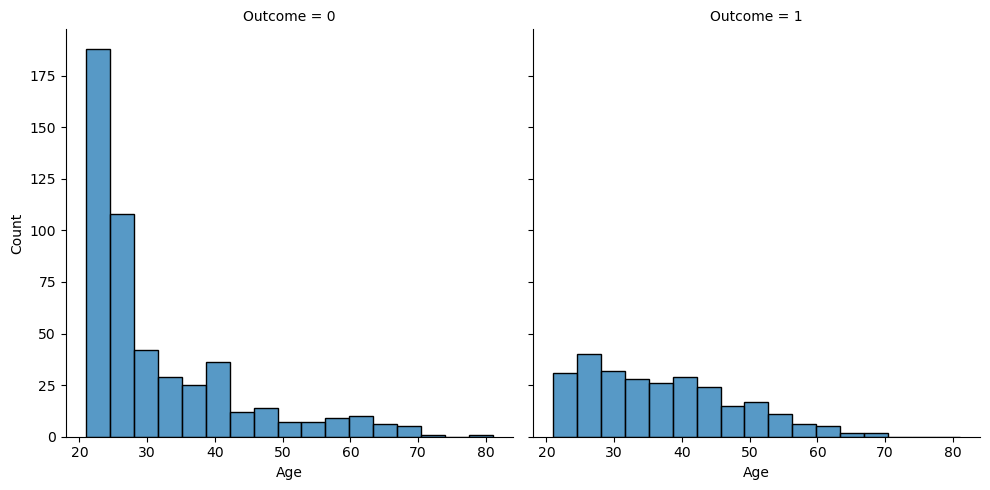

In [38]:
sns.displot(df, x="Age", col="Outcome")